# UN MODELO EPIDEMIOLÓGICO PARA LA ESTIMACIÓN DE LA PROPAGACIÓN DEL COVID_19 EN EL PERÚ

    * Autor: Leonela Analí Tacure Purizaca
    * Computación Científica
    * Universidad Nacional Mayor de San Marcos

    Muchos se han estado preguntando que es el COVDI-19, cómo los epidemiologos pueden predecir la propagación o una posible prevención de la pandemia, ¿Qué está en juego en esta pandemia de coronavirus? ¿Cuántos peruanos pueden infectarse? ¿Cuántos podrían morir?. 

    Las respuestas dependen de las acciones que tomamos y, de manera crucial, de cuándo las tomamos.

    Uno de los modelos epidemiologicos que nos pueden ayudar a entender la propagación del virus esta basado en ecuaciones diferenciales ordinales. En este artículo se presentará un codigo que nos puede ayudar a entender un poco más esto.

## 1. INTRODUCCIÓN

    A nivel mundial el día 11 de marzo el  Covid-19 se decreto Pandemía pos la Organización Mundial de la Salud (OMS), en esos momentos habia más de 118.000 casos en 114 países y 4291 personas que habian perdido la vida [1]. En Perú se dio a conocer el primer caso el 06 de marzo, a fin de contener y controlar la propagación del COVID-19, el Gobierno declaró el 15 de marzo el estado de emergencia nacional, vía Decreto Supremo 040-2020-PCM y con vigencia de 15 días calendario [2].

    Al 19 de marzo de 2020 se han procesado 3,841 muestras por coronavirus COVID-19, obteniéndose, hasta las 06:00 horas, 234 resultados positivos. Con un contagio 193 infectados en Lima y 41 casos en el resto del país. 
    
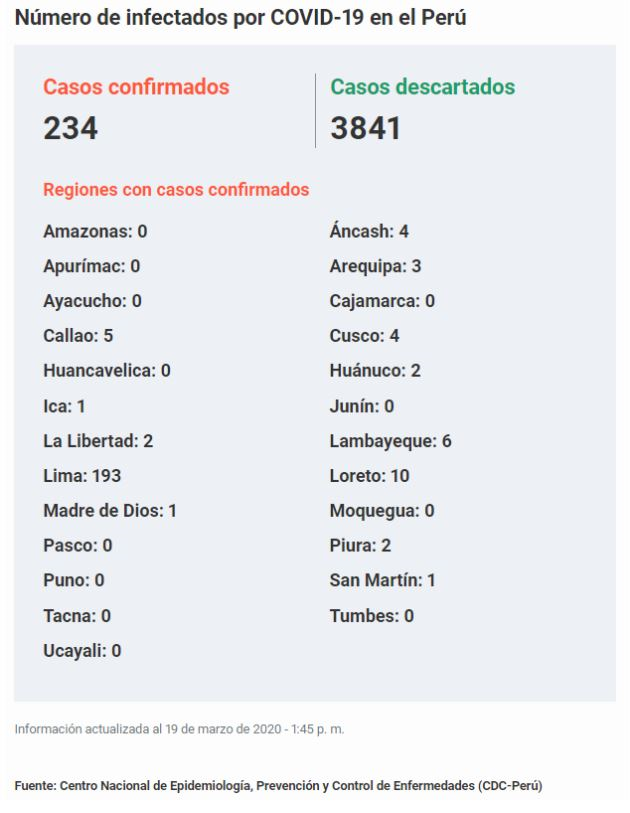


## 2. METODOLOGIA

### Modelo SIR

    Para determinar el comportamiento de la propagación se usara un modelación matemática llamado SIR, modelo utilizado para casos epidemiologicos que define una población discretizada en tres grupos: Suceptbles, Infectados y Recuperados.

    Se asume que el tamaño completo de la población es N y se definfe N = S + I + R. Con el siguiente sistema de ecuaciones diferenciales:

                > dS/dt = -βSI
                > dI/dt = βIS - ɣI
                > dR/dt = ɣI

   **Población susceptible (S)**: individuos sin inmunidad al agente infeccioso, y que por tanto puede ser infectada si es expuesta al agente infeccioso.
   
   **Población infectada (I)**  : indiviuos que están infectados en un momento dado y pueden transmitir la infección a individuos de la población suscpetible con la que entran en contacto.
   
   **Población recuperada (R)** : individuos que son inmunes a la infección, y consecuentemente no afectan a la transmisión cuando entran en contacto con otros individuos.
   
   **β** es la tasa de propagación a cada vecino suceptible y **ɣ** hace referencia a la tasa de recuperación.

Típicamente se toman como condiciones iniciales t0 = 0 y S(t0) > 0, I(t0) > 0 para que pueda haber contagio.
Además, como se supone que el brote inicia en t0, suele tomarse R(t0) = 0.

## SOLUCIÓN


In [30]:
#Library
import numpy as np
import pandas as pd
import scipy.integrate as spi
import pylab as pl

#Información sobre la población
N=1
beta=1.4247
gamma=0.14286

'''time step'''
TS=1.0 
ND=70.0
S0=1-1e-6
I0=1e-6
INPUT = (S0, I0, 0.0)


def diff_eqs(INP,t):  
    Y=np.zeros((3))
    V = INP
    '''Las ecuaciones diferenciales'''
    Y[0] = - beta * V[0] * V[1]
    Y[1] = beta * V[0] * V[1] - gamma * V[1]
    Y[2] = gamma * V[1]
    return Y   # For odeint

t_start = 0.0; t_end = ND; t_inc = TS
t_range = np.arange(t_start, t_end+t_inc, t_inc)
RES = spi.odeint(diff_eqs,INPUT,t_range)

#Gráfica
pl.plot(RES[:,0]*N, '-g', label='Susceptibles')
pl.plot(RES[:,2]*N, '-k', label='Recuperados')
pl.plot(RES[:,1]*N, '-r', label='Infectados')
pl.legend(loc=0)
pl.title('Modelo SIR básico')
pl.xlabel('Tiempo')
pl.savefig('sirpy')

In [31]:
#Saber la ruta de trabajo
import os
os.getcwd()

'C:\\Users\\flore\\💚 COV-19'

In [57]:
file='CSV_covid_19.csv'
data = pd.read_csv(file) 
data.head(2)

,Title,Authors,Abstract,Published Year,Published Month,Journal,Volume,Issue,Pages,Accession Number,DOI,Ref,Covidence #,Study,Notes,Tags
0,Platelet-to-lymphocyte ratio is associated wit...,"Qu, Rong; Ling, Yun; Zhang, Yi-Huizhi; Wei, Li...","INTRODUCTION: SinceDecember 2019, novelcoronav...",2020.0,NaN,Journal of medical virology,NaN,NaN,NaN,NaN,10.1002/jmv.25767,9121,#8973,Qu 2020,NaN,* Case study/series; * Opinion piece; Clinical...
1,Epidemiologic and Clinical Characteristics of ...,"Qian, Guo-Qing; Yang, Nai-Bin; Ding, Feng; Ma,...",BACKGROUND: Recent studies have focused initia...,2020.0,NaN,QJM : monthly journal of the Association of Ph...,NaN,NaN,NaN,NaN,10.1093/qjmed/hcaa089,9120,#9128,Qian 2020,NaN,* Epidemiological study; * Opinion piece; Epid...


In [58]:
#Datos a conciderar

Población = 32625948
Infectados = 234
Recuperados = 1

In [53]:
convert(20)

Se convirtio  20 °C a 68.0 °F


In [54]:
## CONCLUSIONES

Se convirtio  40 °C a 104.0 °F


## DISCUCIONES

    1. Se debe tomar en cuenta que este es un modelo basico a expandir a un modelo de ecuaciones diferenciales estocasticas que discrimina 

In [ ]:
## REFERENCIAS

1. "La OMS caracteriza a COVID-19 como una pandemia - OPS Organización Panamericana de la Salud" tech. rep.
2. "Coronavirus en el Perú - Plataforma digital única del estado peruano (gob.pe)" tech. rep.
2. https://www.minsa.gob.pe/reunis/data/poblacion_estimada.asp
3. https://www.gob.pe/8662